In [2]:
import pandas as pd
import numpy as np
# from CryptoFinance import CryptoScraper as cs
from time import sleep
import math
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import re
import warnings

warnings.simplefilter('ignore')

Mount the bitcoin data on colab

In [4]:
# !gdown 1NY8_t4jiVczB_XuVEVGOxFbKiCyRRdGQ

Downloading...
From: https://drive.google.com/uc?id=1NY8_t4jiVczB_XuVEVGOxFbKiCyRRdGQ
To: /content/Bitcoin_tweets.csv
100% 2.10G/2.10G [00:17<00:00, 122MB/s]


In [5]:

chunks = pd.read_csv("Bitcoin_tweets.csv", chunksize=100000,lineterminator='\n', index_col=0)
df = pd.concat(chunks)
df.head()

,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
user_name,,,,,,,,,,,,
DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


Extract tweets text and date features

In [15]:
tweets = df[['date', 'text']]
tweets.head()

,date,text
user_name,,
DeSota Wilson,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
CryptoND,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
Tdlmatias,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
Crypto is the future,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [16]:
# Make the date the index
tweets.set_index('date', inplace=True)
# tweets.index = pd.to_datetime(tweets.index, infer_datetime_format=True)
tweets.head()

,text
date,
2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [ ]:
# # create hashes as tweet ids using md5
# from hashlib import md5
# hash = md5()

# def hash_value(x):
#     hash.update(x.encode())
#     return hash.hexdigest()

Next, convert the datetime string to datetime object

In [ ]:
# remove datapoints that are not of datetime string format in the "date" feature
try:
    tweets.index = pd.to_datetime(tweets.index, errors='coerce')
except (pd.errors.ParserError, ValueError):
    pass

tweets.dropna(subset=tweets.index, inplace=True)


In [18]:
tweets.index = pd.to_datetime(tweets.index)

In [19]:
tweets.index

DatetimeIndex(['2021-02-10 23:59:04', '2021-02-10 23:58:48',
               '2021-02-10 23:54:48', '2021-02-10 23:54:33',
               '2021-02-10 23:54:06', '2021-02-10 23:53:30',
               '2021-02-10 23:53:17', '2021-02-10 23:52:42',
               '2021-02-10 23:52:25', '2021-02-10 23:52:08',
               ...
               '2023-01-06 17:46:53', '2023-01-06 17:46:50',
               '2023-01-06 17:46:50', '2023-01-06 17:46:44',
               '2023-01-06 17:46:36', '2023-01-06 17:46:35',
               '2023-01-06 17:46:29', '2023-01-06 17:46:22',
               '2023-01-06 17:46:20', '2023-01-06 17:46:17'],
              dtype='datetime64[ns]', name='date', length=4689354, freq=None)

In [22]:
tweets.shape

(4689354, 1)

Due to the size of the tweets data (4689354 tweets), the data is resampled on 3 minutes, selecting the last tweet, so the sentiment analysis can be completed in time (about 10 hours). The row reduced to 337703.

In [23]:
tweets_resampled = tweets.resample('3T').last()
tweets_resampled.head()

,text
date,
2021-02-05 10:51:00,#Bitcoin and #ETH both have bullish setups for...
2021-02-05 10:54:00,$PERL 0.06.\nI have insisted that since 0.02 i...
2021-02-05 10:57:00,"#Bitcoin braces for $48,000 as inverse head-an..."
2021-02-05 11:00:00,1 BTC Price: Bitstamp 37475.23 USD Coinbase U...
2021-02-05 11:03:00,We are gaining pace with more and more institu...


In [24]:
tweets_resampled.shape

(337703, 1)

### Sentiment Analysis

In [20]:
import warnings
warnings.simplefilter('ignore')

### Sentiment Analysis with roBERTa

Sentiment Analysis was conducted using Twitter-roBERTa-based, which is a BERT specifically for sentiment analysis for Twitter.

In [21]:
# import torch
# from torch.nn.functional import softmax
# from transformers import AutoModelForSequenceClassification, AutoTokenizer

# model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"

# tokenizer = AutoTokenizer.from_pretrained(model_id) #
# model = AutoModelForSequenceClassification.from_pretrained(model_id)

# def get_sentiment(text):
#     # Tokenize and encode the text
#     encoded_input = tokenizer(text, return_tensors="pt", padding=True, max_length=412, truncation=True)

#     # Get the sentiment prediction from the model
#     outputs = model(**encoded_input)
#     prediction_scores = outputs.logits  # prediction scores for sentiment classes
#     scores = softmax(prediction_scores)

#     # Get the predicted sentiment class (index of the highest score)
#     sentiment = prediction_scores.argmax(axis=1).detach().numpy()  # and convert to NumPy array
#     return sentiment[0]

Run sentiment analysis and save to parquet format

In [ ]:
# tweets_resampled['sentiment'] = tweets_resampled['text'].apply(lambda x: get_sentiment(str(x)))

In [ ]:
# tweets_resampled.to_parquet("tweeets_text_sentiment.parquet", engine='fastparquet')

Sentiment analysis was run with in cells above and the result store

In [25]:
# retrieve tweets_text_sentiment.parquet

!gdown 1iz-3nNGNneot1dK3q5DeCBsZtU23jnym

Downloading...
From: https://drive.google.com/uc?id=1iz-3nNGNneot1dK3q5DeCBsZtU23jnym
To: /content/tweets_text_sentiment.parquet
100% 11.4M/11.4M [00:01<00:00, 10.0MB/s]


Save result of SA

In [26]:
# tweets_resampled.to_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_sentiment.parquet", engine='fastparquet')
# tweets_sentiment = pd.read_parquet(r"C:\Users\abume\Downloads\Bitcoin_tweets\tweeets_text_sentiment.parquet")
tweets_sentiment = pd.read_parquet("tweets_text_sentiment.parquet")
tweets_sentiment.index = tweets_sentiment.index.tz_localize('UTC')
tweets_sentiment.head()

,text,sentiment
date,,
2021-02-05 10:51:00+00:00,#Bitcoin and #ETH both have bullish setups for...,2
2021-02-05 10:54:00+00:00,$PERL 0.06.\nI have insisted that since 0.02 i...,2
2021-02-05 10:57:00+00:00,"#Bitcoin braces for $48,000 as inverse head-an...",1
2021-02-05 11:00:00+00:00,1 BTC Price: Bitstamp 37475.23 USD Coinbase U...,1
2021-02-05 11:03:00+00:00,We are gaining pace with more and more institu...,2


Resample sentiments by Hour, using the most common sentiment in the hour as the sentiment

In [27]:
def most_common_sentiment(series):
    return series.mode()[0]

sentiment = tweets_sentiment["sentiment"]

# mode = pd.Series.mode()

sentiment = sentiment.resample('60T').apply(most_common_sentiment)

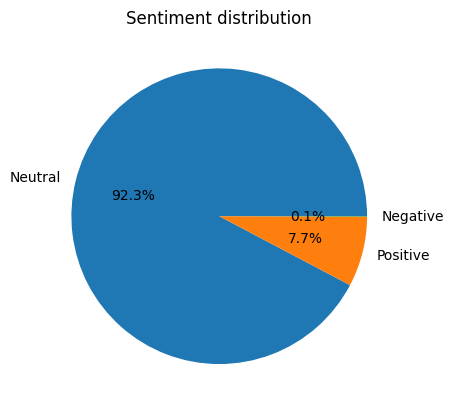

In [40]:
import matplotlib.pyplot as plt

labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

sentiment.value_counts().plot(kind='pie', title='Sentiment distribution',
                              labels=[labels[i] for i in sentiment.value_counts().index],
                              autopct='%1.1f%%')
plt.ylabel('')
plt.show()


<!--  -->

<b>Now let's retrieve the bitcoin data from the database via the CryptoAppScrapper app</b>

A period of 730 days with a frequency of 1 hour is used.

In [44]:
# cache_explorer = cs.CacheExplorer(currency='BTC', period='730d')
# df = cache_explorer.get_currency_history()


# df['datetime'] = df['_id']
# df.set_index(df['datetime'], inplace=True)
# df.index = pd.to_datetime(df.index, infer_datetime_format=True)
# df.head()


# btc = df[['Open', 'High', 'Low', 'Close']]
# btc.head()

In [ ]:
# merged_data = btc.merge(sentiment, left_index=True, right_index=True, how='left')
# merged_data.head()


In [ ]:
# data_clean = merged_data.dropna(axis=0)

In [ ]:
# merged_data.isna().sum()

Open            0
High            0
Low             0
Close           0
sentiment    4835
dtype: int64

Drop NA values of the merged data and save to parque

In [45]:
# data_clean = merged_data.dropna(axis=0)
# data_clean.to_parquet("btc_sentiment.parquet")

# RUNS START HERE FOR COLAB

In [46]:
import pandas as pd
import numpy as np
# from CryptoFinance import CryptoScraper as cs
from time import sleep
import math
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import re
import warnings

warnings.simplefilter('ignore')

In [47]:
!gdown 1KR7-k256i6dIM1aXcrCuIvATIr0uBQjq

Downloading...
From: https://drive.google.com/uc?id=1KR7-k256i6dIM1aXcrCuIvATIr0uBQjq
To: /content/btc_sentiment.parquet
100% 476k/476k [00:00<00:00, 127MB/s]


In [48]:
data_clean = pd.read_parquet('btc_sentiment.parquet')
data_clean

,Open,High,Low,Close,sentiment
date,,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,1
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,1
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,1
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,1
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,1
...,...,...,...,...,...
2023-01-09 19:00:00+00:00,14236.488281,14236.488281,14195.312500,14195.312500,1
2023-01-09 20:00:00+00:00,14192.876953,14195.422852,14126.580078,14128.775391,1
2023-01-09 21:00:00+00:00,14130.629883,14159.559570,14106.828125,14107.657227,1


In [49]:
data_clean['sentiment'].value_counts()

1    11552
2      915
0        2
Name: sentiment, dtype: int64

In [5]:
# def classify_sentiment(value):
#     return 1 if value == 1 else (2 if value > 1 else 0)

In [6]:
# data_clean['sentiment'] = data_clean['sentiment'].apply(lambda x: classify_sentiment(x))

In [7]:
data_clean.describe()

,Open,High,Low,Close,sentiment
count,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000
mean,26837.956039,26933.007736,26739.094500,26836.233969,1.073222
std,9751.803580,9796.445450,9705.191632,9752.270962,0.261125
min,13225.777344,13288.554688,13195.842773,13228.312500,0.000000
25%,17498.417969,17540.890625,17443.201172,17491.777344,1.000000
50%,28122.261719,28218.951172,27980.861328,28113.849609,1.000000
75%,33923.312500,34081.207031,33820.777344,33931.281250,1.000000
max,50979.144531,51068.097656,50859.015625,50992.585938,2.000000


In [8]:
data_clean.isna().sum()

Open         0
High         0
Low          0
Close        0
sentiment    0
dtype: int64

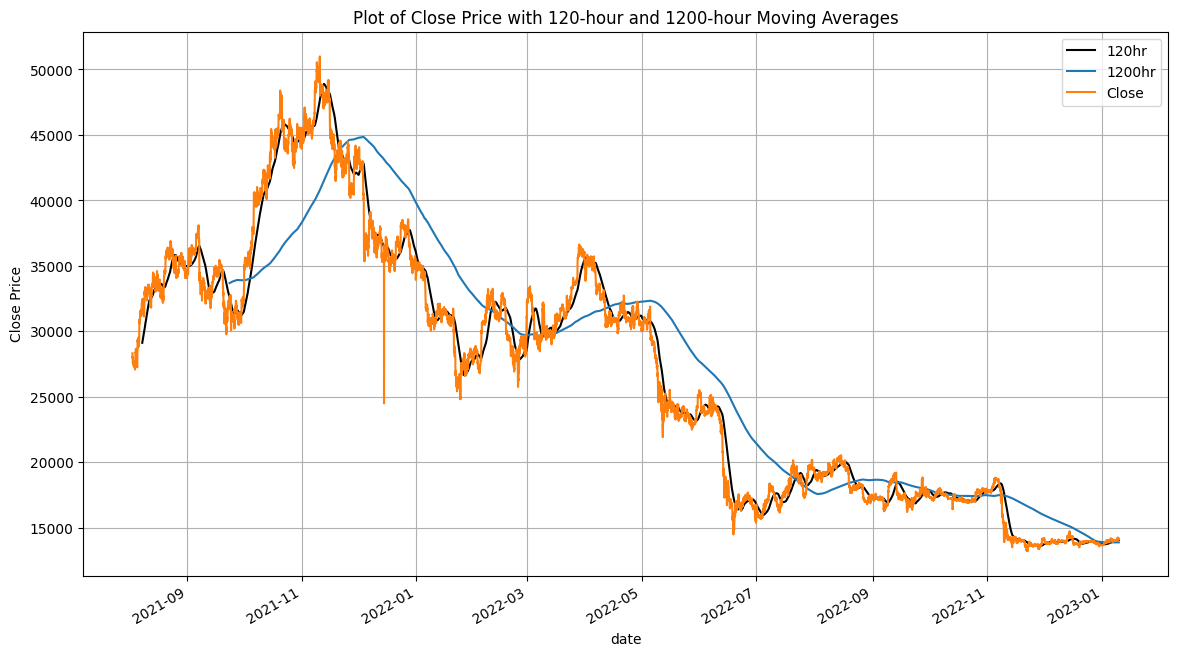

In [9]:
plt.figure(figsize=(14,8))
data_clean['Close'].rolling(120).mean().plot(label='120hr', color='black')
data_clean['Close'].rolling(1200).mean().plot(label='1200hr')
data_clean['Close'].plot(label='Close')
plt.grid(True)
plt.ylabel('Close Price')
plt.title('Plot of Close Price with 120-hour and 1200-hour Moving Averages')
plt.legend();

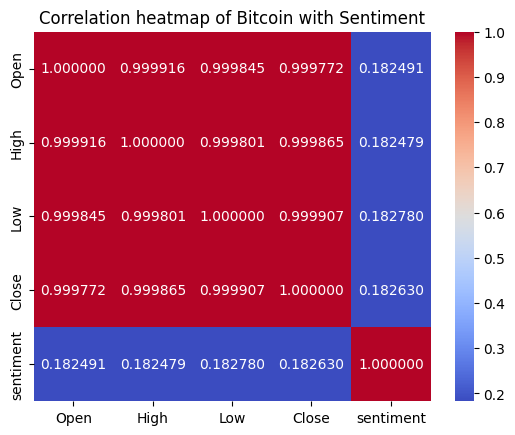

In [10]:
sns.heatmap(pd.DataFrame(data_clean).corr(), cmap='coolwarm', annot=True, fmt='4f')
plt.title('Correlation heatmap of Bitcoin with Sentiment');

In [11]:
# data_clean.iloc[:9975]

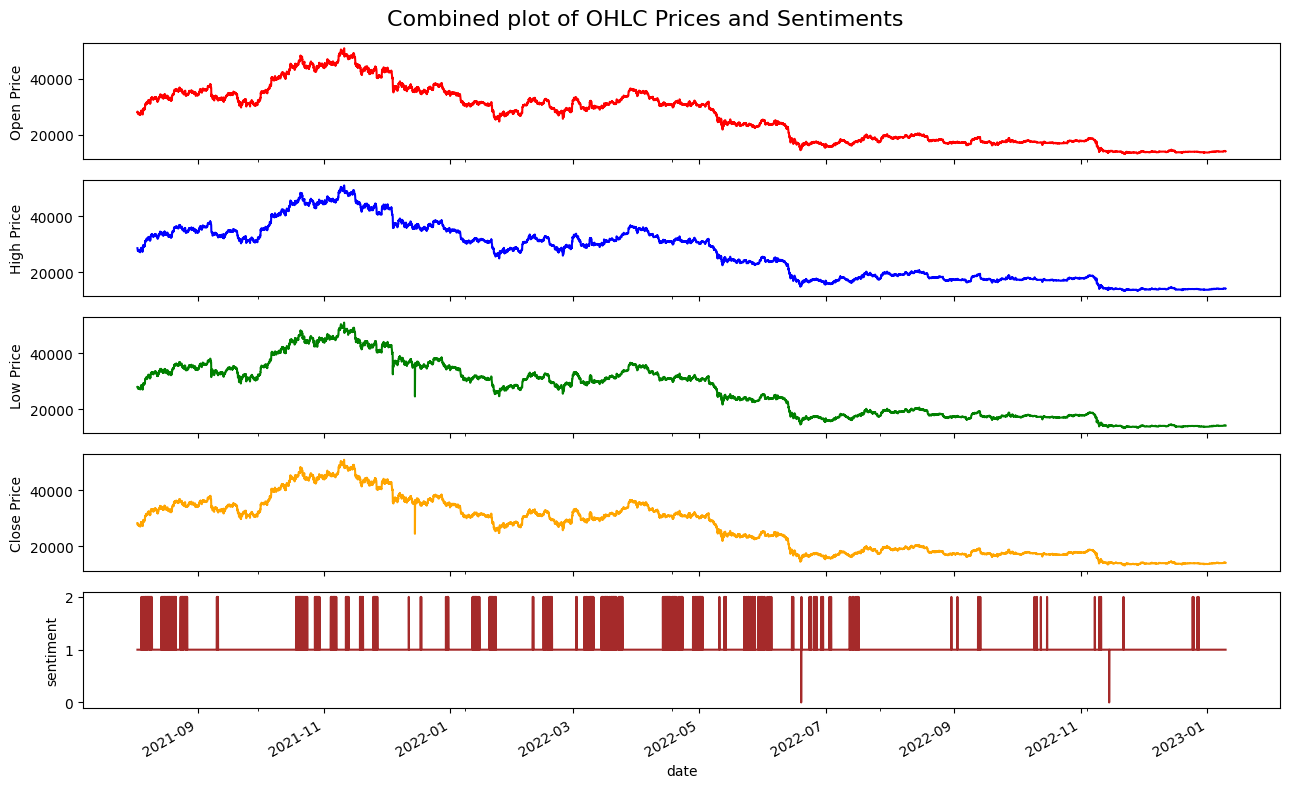

In [5]:
fig, axes = plt.subplots(nrows=len(data_clean.columns), figsize=(13, 8), sharex=True)

fig.suptitle('Combined plot of OHLC Prices and Sentiments', fontsize=16)

color = ['red', 'blue', 'green', 'orange', 'brown']

# Plot each column in a separate subplot
for i, column in enumerate(data_clean.columns):
    data_clean[column].plot(ax=axes[i], color=color[i])
    axes[i].set_ylabel(column + ' Price')
axes[4].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
# fig, ax = plt.subplots(figsize=(13,7))
# train['Close'].plot(ax=ax, label='Training subset')
# test['Close'].plot(ax=ax, label='test subset', color='grey')
# ax.axvline(data_clean.index[9975], color='red', ls='--')
# plt.legend()
# plt.show()

## Preprocess and Splits

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()


def split_data(df, window_length=240):
    X = []
    y = []
    # df = df.to_numpy()
    for i in range(len(df)-window_length):
      row = [a for a in df[i:i+window_length]]
      X.append(row)
      label = df[i+window_length][3]
      y.append(label)

    return np.array(X), np.array(y)


In [8]:
data_scaled = scaler.fit_transform(data_clean)

In [9]:
from keras.preprocessing.sequence import TimeseriesGenerator

def split_generate(window_length, num_features, batch_size=32, use_generator=True):
  lstm_features = data_scaled
  lstm_target = data_scaled[:, 3]
  X, y = split_data(data_scaled)

  # Split X and y into train and temporary test_set
  X_train, X_raw, y_train, y_raw = train_test_split(lstm_features, lstm_target,
                                                      train_size=.8, random_state=42, shuffle=False)

  # Split the temporary test set into validation and test
  X_test, X_val, y_test, y_val = train_test_split(X_raw, y_raw,
                                                      train_size=.8, random_state=42, shuffle=False)
  if use_generator:
    train = TimeseriesGenerator(X_train, y_train, length=window_length, batch_size=batch_size)
    test = TimeseriesGenerator(X_test, y_test, length=window_length, batch_size=batch_size)
    val = TimeseriesGenerator(X_val, y_val, length=window_length, batch_size=batch_size)
    print(f'Number of batches: {batch_size}\nObservations per batch: {window_length}\nFeatures per observation: {num_features}')
    print(f'Generator splits shape: {train[0][0].shape}')
    return train, val, test

  else:
    print('Splits for GridSearchCV and NN have the following shapes for: X_train, y_train, X_val, y_val, X_test, y_test:')
    X_train, y_train = X[:9000], y[:9000]
    X_val, y_val = X[9000:10200], y[9000:10200]
    X_test, y_test = X[10200:], y[10200:]
    print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
    return X_train, y_train, X_val, y_val, X_test, y_test


<!--  -->

Hyperparameter tuning with GridSearchCV

## LSTM

In [10]:
from tensorflow import keras
from keras.layers import Dense, Input, LSTM, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.activations import relu, sigmoid, tanh
from keras.optimizers import Adam
from keras.losses import MeanSquaredError  # error estimation

In [11]:
data_clean.head()

,Open,High,Low,Close,sentiment
date,,,,,
2021-08-03 00:00:00+00:00,28204.455078,28602.572266,27945.894531,28327.294922,1
2021-08-03 01:00:00+00:00,28326.119141,28326.119141,27973.533203,27973.533203,1
2021-08-03 02:00:00+00:00,27974.931641,28125.648438,27919.728516,28064.576172,1
2021-08-03 03:00:00+00:00,28064.537109,28067.361328,27771.798828,27840.082031,1
2021-08-03 04:00:00+00:00,27833.152344,27925.753906,27577.039062,27577.039062,1


Apply Feature Scaling

In [12]:
data_scaled = scaler.fit_transform(data_clean)
data_scaled

array([[0.39675078, 0.40535211, 0.39163062, 0.39982187, 0.5       ],
       [0.39997338, 0.39803458, 0.39236446, 0.39045424, 0.5       ],
       [0.39067123, 0.39272825, 0.39093588, 0.39286506, 0.5       ],
       ...,
       [0.02396747, 0.02305493, 0.0241877 , 0.0232851 , 0.5       ],
       [0.02337879, 0.02255411, 0.02411709, 0.02370446, 0.5       ],
       [0.02380047, 0.02231633, 0.02379314, 0.02341838, 0.5       ]])

Split data into train, validation, test sets.

Here, I am using all features as the training data, while the target is the validation data.

In [14]:
window_length = 1*24*10 # hourly observations of ten days = 240 hours
batch_size = 32 # 32 observations or rows per batch
num_features = 5 # features - OHLCS


Get training and testing dataset, also for GridSearch

In [15]:
X_train_lstm, y_train_lstm, X_val_lstm, y_val_lstm, X_test_lstm, y_test_lstm = split_generate(window_length, num_features, use_generator=False)

Splits for GridSearchCV and NN have the following shapes for: X_train, y_train, X_val, y_val, X_test, y_test:
(9000, 240, 5) (9000,) (1200, 240, 5) (1200,) (2029, 240, 5) (2029,)


In [19]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import LSTM, LeakyReLU, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError

In [ ]:
# add early stoppig for performance check
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

# define function to create model
def create_model(units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(window_length, num_features), activation=LeakyReLU(), return_sequences=True))
    model.add(LSTM(int(units/4), activation=LeakyReLU(), return_sequences=False))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss=[MeanSquaredError()])
    return model


# define function to optimise hyperparameters
def tune_hyperparameters():

    model = KerasRegressor(build_fn=create_model)

    param_grid = {
        'units': [32, 64, 128],
        'epochs': [20, 35, 50],
        'batch_size': [32, 64, 128]
    }

    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_results = grid.fit(X_train_lstm, y_train_lstm, callbacks=[early_stopping], validation_data=(X_val_lstm, y_val_lstm))
    # grid.fit_generator(train_generator)

    print(f'\n\nBest tuned Hyperparameters: {grid_results.best_params_}')


tune_hyperparameters()


Epoch 1/20
188/188 [==============================] - 30s 144ms/step - loss: 0.0628 - val_loss: 0.0032
Epoch 2/20
188/188 [==============================] - 27s 141ms/step - loss: 0.0141 - val_loss: 0.0157
Epoch 3/20
94/94 [==============================] - 3s 34ms/step
Epoch 1/20
188/188 [==============================] - 29s 140ms/step - loss: 109.6250 - val_loss: 0.0073
Epoch 2/20
188/188 [==============================] - 26s 140ms/step - loss: 0.0344 - val_loss: 0.0105
Epoch 3/20
94/94 [==============================] - 3s 32ms/step
Epoch 1/20
188/188 [==============================] - 29s 142ms/step - loss: nan - val_loss: nan
Epoch 2/20
94/94 [==============================] - 3s 32ms/step
Epoch 1/20
188/188 [==============================] - 37s 179ms/step - loss: 0.0143 - val_loss: 8.4078e-05
Epoch 2/20
188/188 [==============================] - 32s 171ms/step - loss: 0.0027 - val_loss: 5.8981e-05
Epoch 3/20
188/188 [==============================] - 33s 173ms/step - loss: 0.0

The optimally tuned hyperparameters is used to build the LSTM model.

Best tuned Hyperparameters: {'batch_size': 128, 'epochs': 35, 'units': 32}

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=32, input_shape=(window_length, num_features), return_sequences=True))
lstm_model.add(LeakyReLU(alpha=.2))
lstm_model.add(LSTM(units=8, return_sequences=False))
lstm_model.add(LeakyReLU(alpha=.2))
lstm_model.add(Dropout(rate=0.2))
lstm_model.add(Dense(units=1))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 240, 32)           4864      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 240, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 6,185
Trainable params: 6,185
Non-trainabl

Split to get generator data

In [16]:
lstm_train, lstm_test, lstm_val = split_generate(window_length=window_length,num_features=num_features, use_generator=True)

Number of batches: 32
Observations per batch: 240
Features per observation: 5
Generator splits shape: (32, 240, 5)


Train the model

In [ ]:
# lstm_model.compile(optimizer='adam', loss='MSE', metrics=[MeanSquaredError()])

# history = lstm_model.fit_generator(lstm_train, epochs=35,
#                                    validation_data=lstm_val,
#                                    shuffle=False)


Epoch 1/35
305/305 [==============================] - 46s 138ms/step - loss: 0.0270 - mean_squared_error: 0.0269 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 2/35
305/305 [==============================] - 41s 135ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0041 - val_mean_squared_error: 0.0042
Epoch 3/35
305/305 [==============================] - 41s 133ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 4/35
305/305 [==============================] - 40s 133ms/step - loss: 0.0283 - mean_squared_error: 0.0282 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 5/35
305/305 [==============================] - 41s 133ms/step - loss: 0.0347 - mean_squared_error: 0.0346 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6/35
305/305 [==============================] - 40s 133ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 7/35

Visualise the train and validation losses over epoch

Epoch 1/35
71/71 [==============================] - 18s 189ms/step - loss: 0.0540 - mean_squared_error: 0.0535 - val_loss: 7.7818e-05 - val_mean_squared_error: 7.7192e-05
Epoch 2/35
71/71 [==============================] - 13s 181ms/step - loss: 0.0295 - mean_squared_error: 0.0293 - val_loss: 9.9153e-05 - val_mean_squared_error: 9.4596e-05
Epoch 3/35
71/71 [==============================] - 12s 174ms/step - loss: 0.0219 - mean_squared_error: 0.0217 - val_loss: 1.9667e-04 - val_mean_squared_error: 1.9458e-04
Epoch 4/35
71/71 [==============================] - 12s 174ms/step - loss: 0.0179 - mean_squared_error: 0.0177 - val_loss: 4.0557e-04 - val_mean_squared_error: 4.0739e-04
Epoch 5/35
71/71 [==============================] - 12s 173ms/step - loss: 0.0147 - mean_squared_error: 0.0146 - val_loss: 6.9825e-05 - val_mean_squared_error: 6.8746e-05
Epoch 6/35
71/71 [==============================] - 12s 175ms/step - loss: 0.0123 - mean_squared_error: 0.0122 - val_loss: 1.0366e-04 - val_mean_

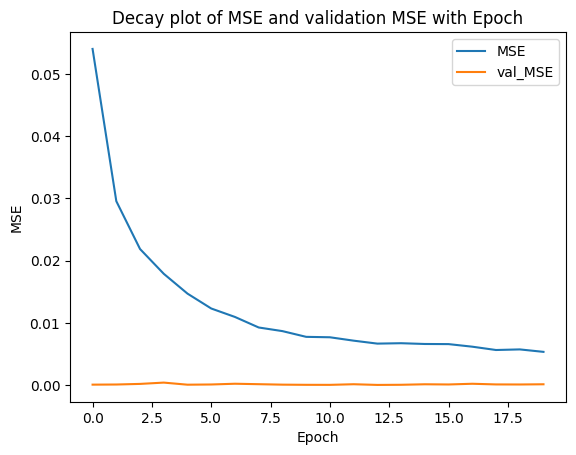

In [ ]:
lstm_model.compile(optimizer='adam', loss='MSE', metrics=[MeanSquaredError()])

early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=7, mode='min', restore_best_weights=True)

history_lstm = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=35,
                          batch_size=128,
                          validation_data=(X_val_lstm, y_val_lstm),
                          callbacks=[early_stopping_lstm],
                          shuffle=False)


plt.plot(history_lstm.history["loss"], label="MSE")
plt.plot(history_lstm.history["val_loss"], label="val_MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.title('Decay plot of MSE and validation MSE with Epoch')
plt.show()

Evaluate the model performance

In [ ]:
# lstm_model.evaluate_generator(lstm_test)

[0.00021004620066378266, 0.00020940475224051625]

In [ ]:
lstm_model.evaluate(X_test_lstm)

64/64 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - mean_squared_error: 0.0000e+00


[0.0, 0.0]

Predict next values

In [ ]:
# predictions = lstm_model.predict_generator(lstm_test)
# predictions.shape

(259, 1)

In [ ]:
pred_lstm = lstm_model.predict(X_test_lstm)
pred_lstm.shape

64/64 [==============================] - 2s 37ms/step


(2029, 1)

In [ ]:
y_test_lstm.shape

(2029,)

For the purpose of inverse scaling, the prediction array is repreated 5 times to match the number of features in the original dataframe.

In [ ]:
pred_lstm_copies = np.repeat(pred_lstm, data_scaled.shape[1], axis=-1)
pred_lstm_copies.shape

(2029, 5)

In [ ]:
# pred_lstm_copies = np.repeat(pred_lstm, data_scaled.shape[1], axis=-1)
pred_lstm_df = pd.DataFrame(scaler.inverse_transform(pred_lstm_copies)[:,0])
# data_clean['Close'].plot()
# pred_lstm_df.plot()

In [ ]:
# data_clean.iloc[10200:].shape

In [22]:
def rebuild_data_and_score(predictions, plot_start_hours=0, plot_end_hours=100, return_df=False):
    pred_copies = np.repeat(predictions, data_scaled.shape[1], axis=-1) # make 5 copies of prediction array
    actual_pred = pd.DataFrame(scaler.inverse_transform(pred_copies)[:,0]) # inverse transfrom to actual values and return one column
    rebuilt_df = data_clean[predictions.shape[0]*-1:]
    rebuilt_df['Pred'] = actual_pred.to_numpy()
    rebuilt_df['Close_Trend'] = rebuilt_df['Close'].diff() > 0 # trend for Close price
    rebuilt_df['Pred_Trend'] = rebuilt_df['Pred'].diff() > 0 # trend for Predicted price

    matching_percentage = np.mean(rebuilt_df['Close_Trend'] == rebuilt_df['Pred_Trend']) * 100 # value-wise comparisons both trends
    print(f"Matching Percentage: {matching_percentage:.2f}%\n\n")

    if plot_end_hours-plot_start_hours < 3:
      print('\033[91m' + 'Error: plot_end_hours should be greater than plot_start_hours by at least 3' + '\033[0m')

    # visualise close and predicted prices
    rebuilt_df[['Close_Trend', 'Pred_Trend']].astype('int')[plot_start_hours:plot_end_hours].plot(figsize=(14,6))
    plt.title(f"Matching Plot of Close Trend vs. Prediction Trend for {plot_end_hours-plot_start_hours} hours")
    plt.ylabel('Trend (⬆️[1] or ⬇️[0])')
    plt.show()

    rebuilt_df.drop(['Close_Trend',	'Pred_Trend'], axis=1, inplace=True)

    if return_df:
      return rebuilt_df


In [ ]:
lstm_df = rebuild_data_and_score(pred_lstm, plot_start_hours=100, plot_end_hours=180)

<!--  -->

## Transformer

In [18]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# from keras.models import Sequential
from keras.layers import MultiHeadAttention, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError
from keras.models import Model


### Hyperprameter Tuning

In [23]:
X_train_att, y_train_att, X_val_att, y_val_att, X_test_att, y_test_att = split_generate(window_length=240,
                                                                                        num_features=5,
                                                                                        batch_size=32,
                                                                                        use_generator=False)
print('\n')

att_train, att_val, att_test = split_generate(window_length=240,
                                              num_features=5,
                                              batch_size=32,
                                              use_generator=True)

Splits for GridSearchCV and NN have the following shapes for: X_train, y_train, X_val, y_val, X_test, y_test:
(9000, 240, 5) (9000,) (1200, 240, 5) (1200,) (2029, 240, 5) (2029,)


Number of batches: 32
Observations per batch: 240
Features per observation: 5
Generator splits shape: (32, 240, 5)


In [34]:
def create_att_model(key_dim=32, heads=32):
    # model = Sequential()
    # model.add(LSTM(32, input_shape=(window_length, num_features), activation='relu', return_sequences=True))
    input = Input(shape=(window_length, num_features), dtype=tf.float32)
    query_tensor, key_tensor, value_tensor = input, input, input
    attention = MultiHeadAttention(heads, key_dim=key_dim)(query_tensor, key_tensor, value_tensor)
    dropout = Dropout(rate=0.2)(attention)
    attention = MultiHeadAttention(int(heads/4), key_dim=key_dim)(dropout, dropout, dropout)
    dropout = Dropout(0.2)(attention)
    output = Dense(units=1, activation='linear')(dropout)

    model = Model(inputs=input, outputs=output)

    model.compile(optimizer='adam', loss='mse')

    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

def tune_hyperparameters_att():
    model = KerasRegressor(build_fn=create_att_model)

    param_grid = {
        'key_dim': [4, 32, 64],
        'heads': [32, 64],
        'epochs': [20, 35, 50],
        'batch_size': [32, 64, 128]
    }

    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_results = grid.fit(X_train_att, y_train_att, callbacks=[early_stopping], validation_data=(X_val_att, y_val_att))

    print(f'Best tuned Hyperparameters: {grid_results.best_params_}')


tune_hyperparameters_att()



Epoch 1/20
188/188 [==============================] - 10s 38ms/step - loss: 0.0351 - val_loss: 0.0559
Epoch 2/20
188/188 [==============================] - 7s 38ms/step - loss: 0.0319 - val_loss: 0.0411
Epoch 3/20
188/188 [==============================] - 7s 38ms/step - loss: 0.0307 - val_loss: 0.0465
Epoch 4/20
94/94 [==============================] - 1s 14ms/step
Epoch 1/20
188/188 [==============================] - 10s 39ms/step - loss: 0.0883 - val_loss: 0.0853
Epoch 2/20
188/188 [==============================] - 7s 38ms/step - loss: 0.0798 - val_loss: 0.0924
Epoch 3/20
94/94 [==============================] - 1s 14ms/step
Epoch 1/20
188/188 [==============================] - 10s 39ms/step - loss: 0.0601 - val_loss: 0.1256
Epoch 2/20
188/188 [==============================] - 7s 38ms/step - loss: 0.0352 - val_loss: 0.1819
Epoch 3/20
94/94 [==============================] - 1s 14ms/step
Epoch 1/20
188/188 [==============================] - 12s 50ms/step - loss: 0.0368 - val_loss: 

Train and evaluate model the attention model

Nework Layer Information
Model: "model_170"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_171 (InputLayer)         [(None, 240, 5)]     0           []                               
                                                                                                  
 multi_head_attention_340 (Mult  (None, 240, 5)      2949        ['input_171[0][0]',              
 iHeadAttention)                                                  'input_171[0][0]',              
                                                                  'input_171[0][0]']              
                                                                                                  
 dropout_340 (Dropout)          (None, 240, 5)       0           ['multi_head_attention_340[0][0]'
                                                                 

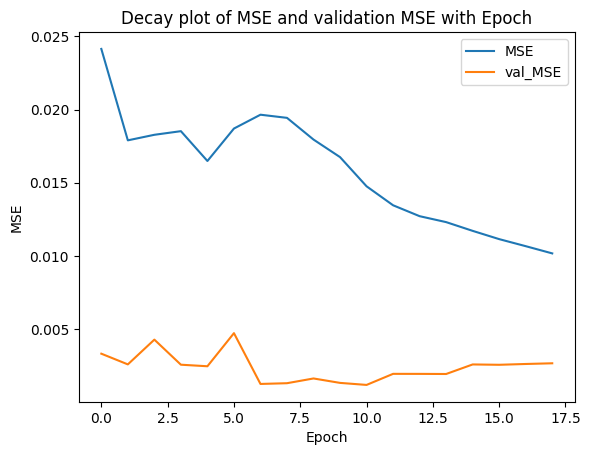



Attention model evaluation
64/64 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Attention  model predictions
64/64 [==============================] - 1s 14ms/step
Prediction shape: (2029, 240, 1)


In [39]:
def summarize_fit_plot_eval_pred():
    input_layer = Input(shape=(window_length, num_features), dtype=tf.float32)
    attention_layer = MultiHeadAttention(num_heads=32, key_dim=4)(input_layer, input_layer, input_layer) # query Q, key K, value V
    dropout_layer = Dropout(0.2)(attention_layer)
    attention_layer = MultiHeadAttention(num_heads=8, key_dim=4)(dropout_layer, dropout_layer, dropout_layer)
    dropout_layer = Dropout(0.2)(attention_layer)
    output_layer = Dense(units=1)(dropout_layer)

    att_model = Model(inputs=input_layer, outputs=output_layer)
    att_model.compile(optimizer='adam', loss='mse')

    print('Nework Layer Information')
    att_model.summary()

    print('\n')


    early_stopping_att = EarlyStopping(monitor='val_loss', patience=7, mode='min')

    att_history = att_model.fit(
        X_train_att, y_train_att,
        epochs=20, callbacks=[early_stopping_att], shuffle=False,
        validation_data=(X_val_att, y_val_att),
        batch_size=32
        )

    print('Loss Plot as epoch increases')
    plt.plot(att_history.history["loss"], label="MSE")
    plt.plot(att_history.history["val_loss"], label="val_MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend(loc="best")
    plt.title('Decay plot of MSE and validation MSE with Epoch')
    plt.show()
    print('\n')

    print('Attention model evaluation')
    att_model.evaluate(X_test_att)
    print('Attention  model predictions')
    att_pred = att_model.predict(X_test_att)
    print(f'Prediction shape: {att_pred.shape}')

    return att_pred

att_predictions = summarize_fit_plot_eval_pred()

In [42]:
aggregated_att_predictions = np.mean(att_predictions, axis=1)  # Average the predictions across attention heads
aggregated_att_predictions.shape

(2029, 1)

In [30]:
y_test_att.shape, att_predictions.shape

((2029,), (1755, 240, 1))

In [40]:
# aggregated_att_predictions = np.mean(att_predictions, axis=1)  # Average the predictions across attention heads
# # aggregated_att_predictions = aggregated_att_predictions.flatten()  # Remove the extra dimension
# # aggregated_att_predictions.reshape(202)
# print(aggregated_att_predictions.shape)  # Should be (2029,)

(2029, 1)


Matching Percentage: 50.22%




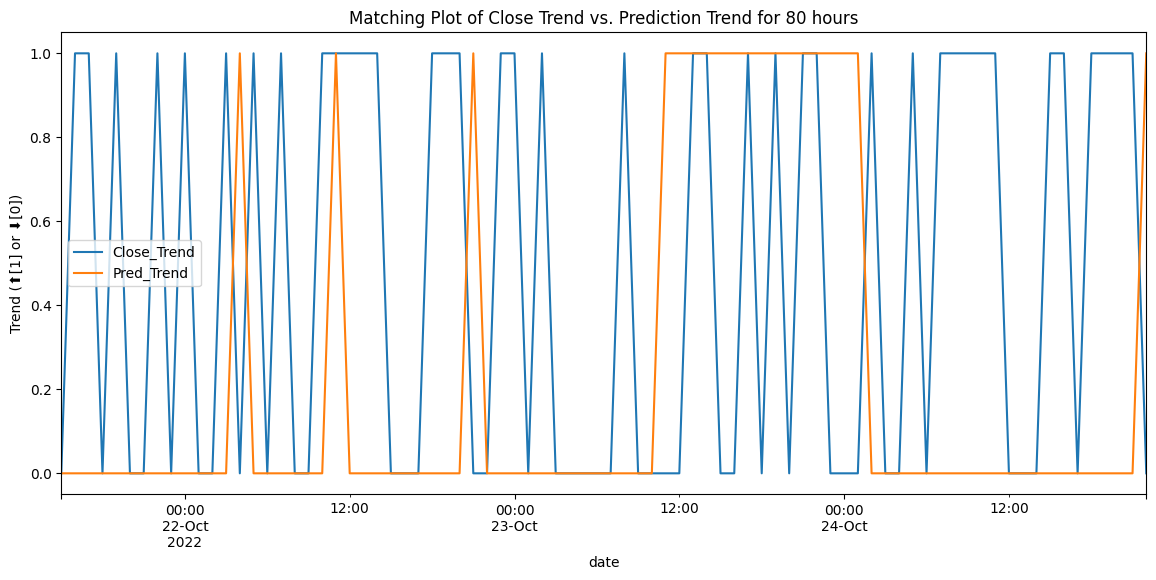

In [56]:
att_df = rebuild_data_and_score(aggregated_att_predictions, plot_start_hours=100, plot_end_hours=180)


<!--  -->

## Combined LSTM and Attention Model

In [86]:
def combine_model(key_dim=4, heads=32):
  # input layer with shape: window_length by num_features
  input_layer = Input(shape=(window_length, num_features), dtype=tf.float32)

  # create an LSTM layer
  lstm_output = LSTM(32, activation=LeakyReLU(), return_sequences=True)(input_layer)
  dropout = Dropout(0.2)(lstm_output)
  lstm_output = LSTM(8, activation=LeakyReLU(), return_sequences=True)(lstm_output)
  dropout = Dropout(0.2)(lstm_output)

  # create an attention layer
  query_tensor, key_tensor, value_tensor = dropout, dropout, dropout
  attention = MultiHeadAttention(heads, key_dim=key_dim)(query_tensor, key_tensor, value_tensor)
  dropout = Dropout(rate=0.2)(attention)
  output_layer = Dense(units=1, activation='linear')(dropout)

  # create a linear model to stack all layers
  model = Model(inputs=input_layer, outputs=output_layer)

  model.compile(optimizer='adam', loss='mse')

  model.summary()

  return model

combined_model = combine_model()

comb_hist = combined_model.fit(X_train_lstm, y_train_lstm,
                         callbacks=[EarlyStopping(monitor='val_loss', patience=7, mode='min')],
                         validation_data=(X_val_lstm, y_val_lstm),
                         shuffle=False,
                         epochs=30, batch_size=32)

Model: "model_180"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_185 (InputLayer)         [(None, 240, 5)]     0           []                               
                                                                                                  
 lstm_12 (LSTM)                 (None, 240, 32)      4864        ['input_185[0][0]']              
                                                                                                  
 lstm_13 (LSTM)                 (None, 240, 8)       1312        ['lstm_12[0][0]']                
                                                                                                  
 dropout_362 (Dropout)          (None, 240, 8)       0           ['lstm_13[0][0]']                
                                                                                          

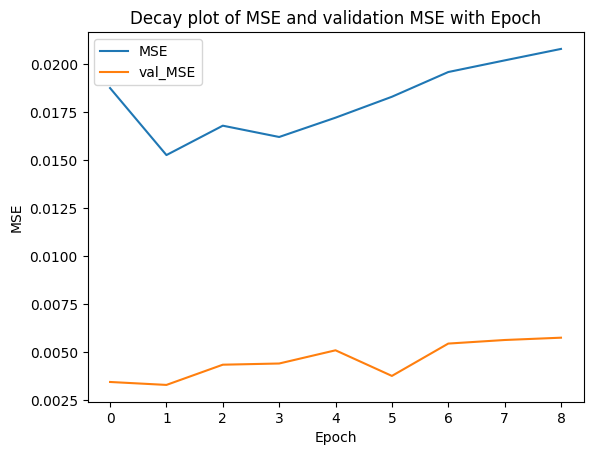

In [87]:
plt.plot(comb_hist.history["loss"], label="MSE")
plt.plot(comb_hist.history["val_loss"], label="val_MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.title('Decay plot of MSE and validation MSE with Epoch')
plt.show()
print('\n')

In [88]:
combined_model.evaluate(X_test_lstm)
comb_pred = combined_model.predict(X_test_lstm)
print('Combined model predictions shape:', comb_pred.shape)

64/64 [==============================] - 5s 80ms/step
Combined model predictions shape: (2029, 240, 1)


Concatenate all attention heads output along the second axis

In [89]:
comb_pred_aggr = np.mean(comb_pred, axis=1)
comb_pred_aggr.shape

(2029, 1)

Matching Percentage: 48.55%




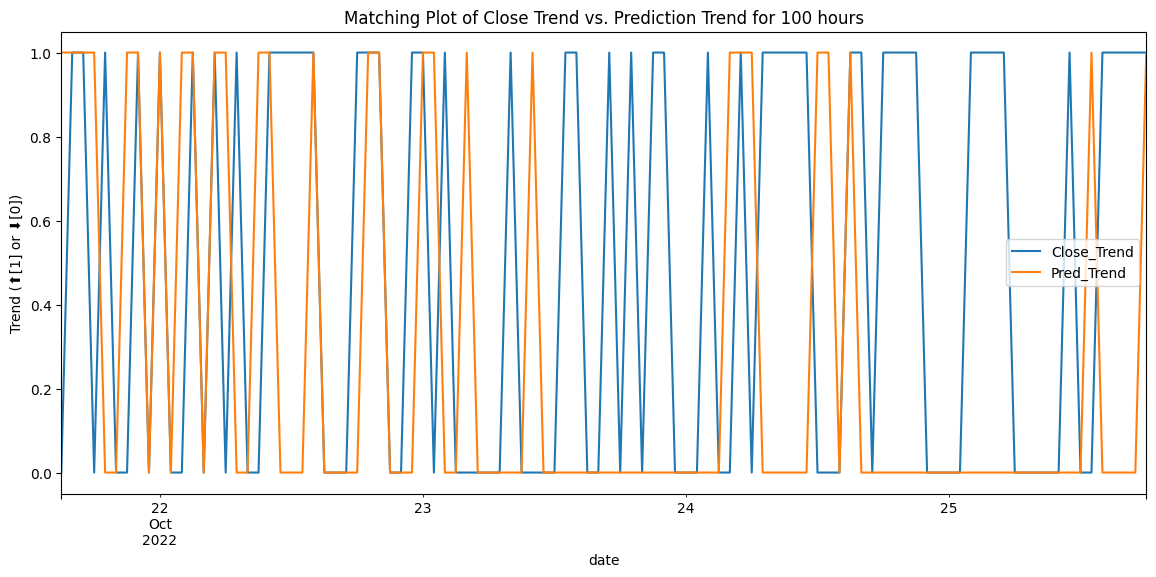

In [90]:
comb_df = rebuild_data_and_score(comb_pred_aggr, 100, 200, True)

## Summary of model perfomance

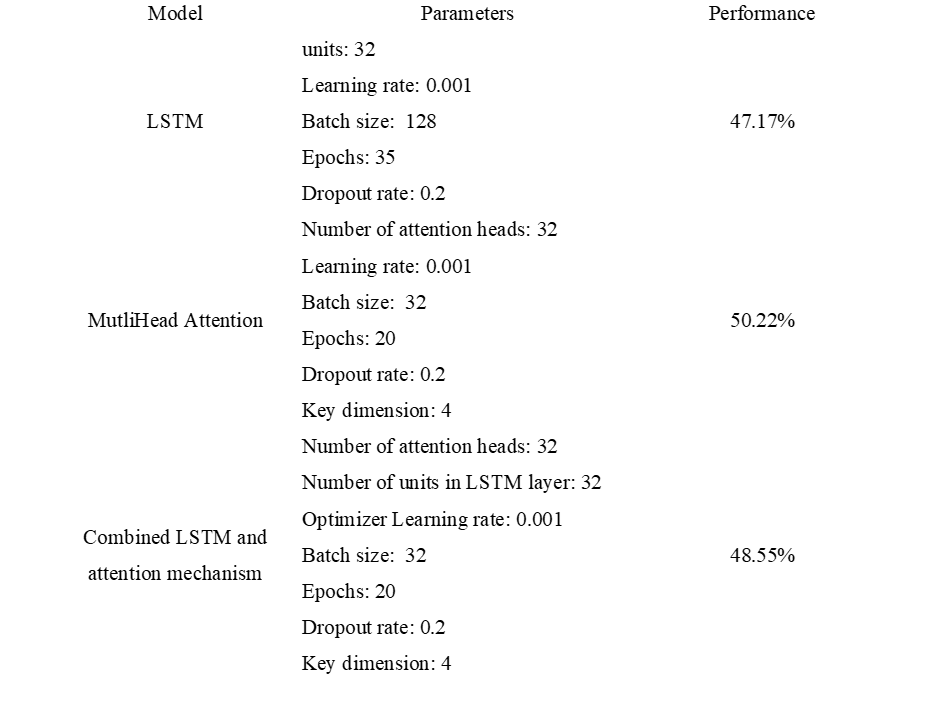